In [1]:
import sys
sys.path.insert(0,"../../ElectricityAndSolar/generated_data/")
import numpy as np
from keras.layers import Activation
import sys
sys.path.insert(0,"../")

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Lambda
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
import tensorflow as tf
import optimization_lib.full_optimisation as opt
import csv 
import matplotlib.pyplot as plts
import math
import sys
sys.path.insert(0,"../../ElectricityAndSolar/generated_data/")
import numpy as np
from keras.layers import Activation
import random

In [2]:
solar_list = []
load_list = []
battery_list = []
battery_cap_list = []

data_list = []

with open('optimization_data.csv') as datafile:
    csv_reader = list(csv.reader(datafile))
    len_file = len(csv_reader)
    i=0
    while(i < len_file):
        #print(csv_reader[i])
        solar = [eval(x) for x in csv_reader[i][:96]]
        load = [eval(x) for x in csv_reader[i][96:192]]
        battery = [eval(x) for x in csv_reader[i][192:288]]
        battery_cap = [eval(csv_reader[i][288])]

        #if(battery_cap == [5000]):
            
        solar_list.append(solar)
        load_list.append(load)
        battery_list.append(battery)
        battery_cap_list.append(battery_cap)

        i += 2

data_len = len(solar_list)
train_set_len = int( 0.75 * data_len)
train_list = random.sample(range(data_len),train_set_len)
test_list = []

for i in range(data_len):
    if i in train_list:
        pass
    else:
        test_list.append(i)



In [3]:
i=0
xtrain_list = [[[solar_list[i][j],load_list[i][j],battery_cap_list[i][0]] for j in range(96)] for i in train_list]
xtrain = np.array(xtrain_list)
xtrain_feed = np.array([solar_list[i] + load_list[i] + battery_cap_list[i] for i in train_list])

ytrain = np.array([battery_list[i] for i in train_list])
#for x in ytrain:
#    print(x)
#ytrain = np.array([[load_list[i][j] - solar_list[i][j] - battery_list[i][j] for j in range(96)] for i in train_list])
#for x in ytrain:
#    print(x)

xval_list = [[[solar_list[i][j],load_list[i][j],battery_cap_list[i][0]] for j in range(96)] for i in test_list]
xval = np.array(xval_list)
xval_feed = np.array([solar_list[i] + load_list[i] + battery_cap_list[i] for i in test_list])
yval = np.array([battery_list[i] for i in test_list])
#yval = np.array([[load_list[i][j] - solar_list[i][j] - battery_list[i][j] for j in range(96)] for i in test_list])


Create RNN model 

In [4]:
func =lambda x : x**3/(1+x**2)

model = Sequential()
model.add(keras.Input(shape=(96,3)))


#  model.add(keras.layers.SimpleRNN(193))
#model.add(Dense(192*3, activation=func))
#model.add(Dense(192*3, activation=func))
model.add(keras.layers.SimpleRNN(192,activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))


"""
model.add(Dense(193,input_dim = 193,activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
#model.add(Dense(100*3, activation=func))
#model.add(Dense(96, activation=func))
#model.add(Dense(100*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
"""

model.add(Dense(96, activation="linear"))
model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=1e-3))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [5]:
history = model.fit(xtrain, ytrain, validation_data=(xval, yval),epochs=2000, batch_size=10000, verbose=1, callbacks=[es])

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2383.8040 - val_loss: 848.5898
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 801.1471 - val_loss: 471.2223
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 449.2028 - val_loss: 337.3755
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 317.4263 - val_loss: 253.8079
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 238.7805 - val_loss: 184.1729
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 174.4236 - val_loss: 158.9061
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 151.3941 - val_loss: 135.6870
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - loss: 129.4561 - val_loss: 123.6632
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 118.1654 - val_loss: 107.3233
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 101.4470 - val_loss: 97.4006
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 92.2173 - val_loss: 89.4813
Epoch 12/2000

In [6]:
load_test1 = [0.9785398266, 0.9592458252, 0.9458740988000002, 0.9304567886, 0.9236439748, 0.9167679383, 0.9039554757999998, 0.8975565049, 0.8912006201, 0.8825564352000002, 0.8778819959, 0.8740215013999999, 0.8738875108, 0.8666690536999999, 0.8642113376000001, 0.8661782079999999, 0.8733951944999999, 0.8786139480999998, 0.8780936227999999, 0.8881625236, 0.9034252527999999, 0.9087774880000001, 0.9196261095000001, 0.9314279514000001, 0.9552527658, 0.9705559877, 0.9853043298, 0.9905223992, 0.9976797309000002, 1.0011740140000003, 1.0037346357999999, 1.0049589074, 1.0109337599000001, 1.0169880732, 1.0233041737, 1.0341794984000001, 1.0392079929, 1.0491963389999999, 1.0555325692, 1.0648232324, 1.0715515247, 1.0869484992000003, 1.0864252844, 1.0943391052, 1.1006473463, 1.1103638991000002, 1.1183307262, 1.1324555425, 1.1385849253, 1.1513443117, 1.1565635959, 1.168494499, 1.1828936994, 1.1927656824, 1.2009329873, 1.2124791918, 1.2286077095999999, 1.2405711603999998, 1.2506143372999998, 1.2616423249, 1.2736140657, 1.2855646366, 1.3013387442000002, 1.3115671463, 1.3187613935000002, 1.3297098487, 1.3403771386, 1.3403730433, 1.3379301623, 1.336756495, 1.3338645406, 1.3253340781999998, 1.3097900167999996, 1.3116597724999999, 1.3057987915, 1.2947954721, 1.2795810951999997, 1.2606807822000001, 1.2481279846, 1.2415977846000001, 1.2382511313, 1.241021907, 1.2422680278, 1.2372614268, 1.2291950745999998, 1.2215018167999998, 1.2132345548999999, 1.1949724623999998, 1.1713747927999998, 1.1500665923, 1.1324636929999998, 1.1088322164000002, 1.0875161524999999, 1.0664417861000002, 1.0517111680999998, 1.0333727273]
solar_test1 = [4.1342e-05, 2.01e-07, 1.53e-07, 1.83e-07, 2.012e-06, 1.65e-07, 1.71e-07, 1.7699999999999998e-07, 1.5899999999999998e-07, 1.35e-07, 1.41e-07, 1.3200000000000002e-07, 1.5e-07, 1.2000000000000002e-07, 7.2e-08, 7.2e-08, 6.600000000000001e-08, 5.4e-08, 6.600000000000001e-08, 8.4e-08, 9.000000000000001e-08, 8.4e-08, 7.2e-08, 6.000000000000001e-08, 4.2e-08, 0.0, 9.3756e-05, 0.012305524, 0.09186968000000001, 0.30367749099999997, 0.636187182, 1.055682374, 1.4842742519999998, 1.937943893, 2.250061765, 2.464030405, 2.539386768, 2.635687894, 2.718475286, 2.75436344, 2.7181150130000002, 2.8107138020000004, 2.797025032, 2.872559953, 2.9309976630000003, 2.9536356930000003, 2.969974978, 2.944804178, 2.956194514, 2.964175753, 2.980485818, 2.961354847, 3.0001166109999997, 2.984556038, 3.044265085, 2.997476538, 2.9990970729999997, 3.005786315, 2.924602309, 2.8975652949999997, 2.954015834, 2.908355254, 2.840358291, 2.842527384, 2.769661511, 2.623827521, 2.6487212519999996, 2.555301868, 2.376532259, 2.1548240329999997, 1.941975097, 1.6735536910000002, 1.559979286, 1.5606085889999999, 1.342190601, 1.121496748, 0.838649988, 0.544531234, 0.290902204, 0.11158169999999999, 0.024727942, 0.000732598, 4.3e-08, 1.45e-07, 1.5100000000000002e-07, 2.432e-06, 1.2699999999999999e-07, 1.45e-07, 1.39e-07, 1.5100000000000002e-07, 6.27e-07, 6.88e-07, 1.33e-07, 1.21e-07, 1.33e-07, 1.2699999999999999e-07]
load_test1 = [x*250 for x in load_test1]
solar_test1 = [x*150 for x in solar_test1]

load_test2 = [58.66977859018507, 53.917866052919884, 49.338940471741545, 45.038376658333696, 41.90423733350838, 38.523905847761036, 35.378706223984445, 32.50377304720295, 31.033082730171373, 29.19004593751792, 27.621900805481705, 26.411053035424345, 26.688273139496346, 26.8276264944854, 27.446079333201528, 28.48218928786389, 32.64737159791961, 35.8906469030988, 39.04536907173946, 42.21097047712275, 50.93064656624157, 56.53733614959987, 61.541532227766766, 66.51919177963761, 76.48715821484579, 82.45392494323443, 86.89408792537454, 90.14365670827038, 96.00635795053468, 98.13970120248536, 98.87141437823, 98.78957895585172, 100.41988148038689, 99.70078555084835, 98.38743688836793, 97.0404187470292, 97.17969447859666, 95.8029634017011, 94.44885865706037, 93.45586974814131, 94.10262007605839, 93.39576107592241, 92.95329239702819, 93.03626655654415, 93.61360358422041, 93.99231394189064, 95.07378390075206, 96.73021729716429, 98.64757932735034, 100.48446212453966, 102.91791518150171, 105.9773279745482, 109.06127798290908, 112.19203681244153, 115.50997529088579, 119.64414778050957, 123.4588393812722, 127.51271896751616, 131.78832854308902, 136.800941001842, 140.40856698762124, 145.29167593087172, 150.62286102815403, 156.7088659632709, 160.84212726218755, 166.84965217959405, 173.4712692630296, 180.6208761227806, 185.13332023726835, 190.81444130925794, 194.99990225577577, 197.87686873071053, 197.50327462934317, 197.6149907620729, 196.8179424328372, 195.39114586586834, 192.713170866071, 190.4455234069634, 187.15621404518734, 183.02585693647526, 178.63050599363893, 173.58445909215527, 167.253860878731, 159.9984959645401, 151.3908423400129, 143.3769203523109, 134.7885504183855, 125.7308053896915, 115.41992191917966, 106.55279104679879, 97.87772672054871, 89.49314788628884, 82.4497869902433, 75.86582903490749, 69.51622594414829, 63.24261085494165]

solar_test2 = [0.008549236731052047, 0.00836679776888114, 0.007505328476084078, 0.00669013856996404, 0.006418743219309544, 0.0067804173717954065, 0.006487397191189078, 0.006444259005029753, 0.006204819514873662, 0.005951433983723958, 0.006104655469672368, 0.006159524778827137, 0.006505876147623745, 0.006454896027816016, 0.006752768612582674, 0.009470148411703018, 0.010906378747738471, 0.013777025420813091, 0.030082770868372202, 0.3441425724965206, 1.6954368919796199, 4.760405174806509, 9.891528335335181, 17.411840327045255, 27.496202610148103, 39.846473051259444, 53.959132351676196, 69.09828210244785, 86.81251748845413, 104.44896706833656, 121.12283849274554, 136.23351199379962, 151.2664998833509, 162.91044324807453, 171.48668035308333, 177.6981302364294, 183.93084204643387, 187.92123727336116, 190.62981472582166, 192.674343898638, 194.9218207463642, 196.12095173388192, 196.61589732578759, 196.98516647397537, 197.71879543138186, 197.74398349183866, 197.564569763852, 197.25208715913269, 197.19139989481505, 196.72981605650503, 196.02724880985423, 195.24551115417066, 194.3698756933762, 193.19380421101104, 191.88259980606367, 189.83383178579155, 187.45635638922795, 184.6116269922227, 181.2491624105451, 176.26297585030503, 168.42961270427386, 159.93431385802216, 150.05793413660467, 137.84864398911955, 123.05323358641654, 108.96886387240629, 94.97372488412763, 80.46915743841528, 65.63229080114583, 51.978642690853356, 39.325165628837674, 28.298856843181728, 19.182622243820344, 12.169768696421455, 7.197971496151612, 4.03213480863077, 2.1814585074084736, 1.1425551544354338, 0.5625476150375269, 0.26818500772001186, 0.12358474082094577, 0.03487028486955649, 0.02919463528880817, 0.02446379278727527, 0.020676583991354174, 0.018803685005688606, 0.015043178685781066, 0.014814937620583038, 0.013982438719883148, 0.0128151171393423, 0.011602747411301921, 0.010860457779738241, 0.010896238592975234, 0.010269834128427276, 0.009524246815233053, 0.008484561481558519]



#solar_test = [x*1.5 for x in solar_test2]
#load_test = [x*1.5 for x in load_test2]
solar_test = solar_test1
load_test = load_test1

battery_power = 4000
battery_Storage = 4000

test_set = np.array([[[solar_test[i],load_test[i] , battery_power ] for i in range(96)]])
#test_set = np.array([solar_test1 + load_test1 + [battery_power]])

predVals = model.predict(test_set)
test_optimal_system = opt.optimalSystemDescription(solar_test,load_test,0,0, batt_power=battery_power,batt_storage=battery_Storage,soc0=40,deviate=0,deep_discharge_limit=10,days=1)
#test_optimal_system.runZeroNet()
test_optimal_system.cost = [0 for i in range(96)]
test_optimal_system.enableBatteryExchangeLimit()
test_optimal_system.minimizePeak()

#plt.plot(solar_test)
#plt.plot(load_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


C:\Users\chitt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


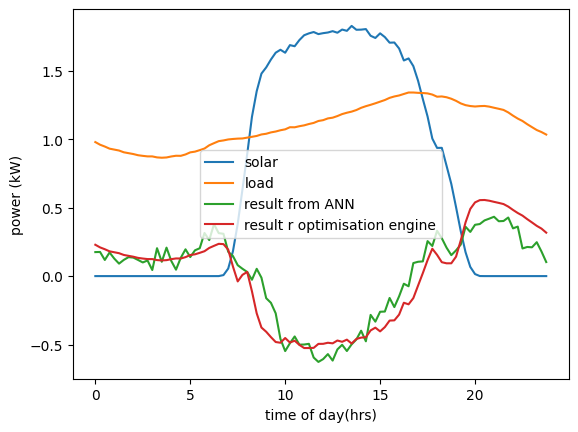

In [7]:
hrs = [i/4 for i in range(96)]
plt.plot(hrs,[x/250 for x in solar_test],label='solar')
plt.plot(hrs,[x/250 for x in load_test],label='load')
battery = [x for x in predVals[0]]
plt.plot(hrs,[x/250 for x in battery],label='result from ANN')
plt.plot(hrs,[x/250 for x in test_optimal_system.optimal_results.battery_stpts],label='result r optimisation engine')
plt.xlabel("time of day(hrs)")
plt.ylabel("power (kW)")

plt.legend()
plt.show()

1600.0
10702.821878532013
11655.017401154131


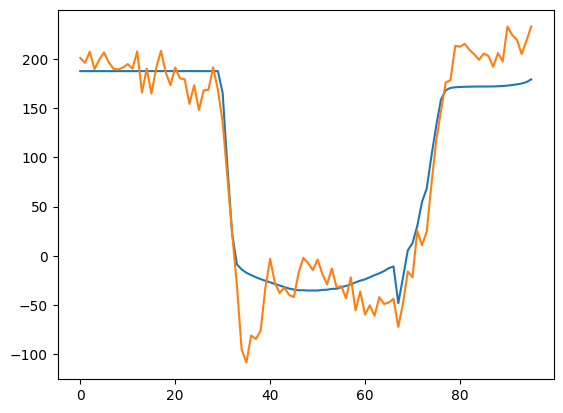

In [8]:
soc0 = 0.4*battery_Storage
print(soc0)
soc = [soc0 + sum(battery[0:i]) for i in range(96)]
soc_opt = [soc0 + sum(test_optimal_system.optimal_results.battery_stpts[0:i]) for i in range(96)]
#plt.plot(soc)
#plt.plot(soc_opt)
E = [load_test[i] - solar_test[i] - battery[i] for i in range(96)]
plt.plot(test_optimal_system.optimal_results.grid_data.grid_import)
plt.plot(E)

print(sum([abs(x) for x in test_optimal_system.optimal_results.grid_data.grid_import]))
print(sum([abs(x) for x in E]))